###  Problem Statement
A automobile company X-Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. The company wants to know:

* Which variables are significant in predicting the price of a car.

* How well those variables describe the price of a car.

### Import common Library package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [2]:
# import dataset
car_data = pd.read_csv('CarPrice_Assignment.csv')
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car_data.shape

(205, 26)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Explore the dataset

In [5]:
car_data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [6]:
car_data = car_data.drop('car_ID', axis = 1)
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
car_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
# Spliting CarName to extract Brands of Car
brand = car_data.CarName.apply(lambda s: s.split()[0])
car_data.insert(3,"CarBrandName", brand)
car_data.drop(['CarName'],axis=1,inplace=True)
car_data.head()

,symboling,fueltype,CarBrandName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
car_data.CarBrandName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
name_correction = {'toyouta': 'toyota',
                  'Nissan': 'nissan',
                  'maxda': 'mazda',
                  'vokswagen': 'volkswagen',
                  'vw':'volkswagen',
                  'porcshce': 'porsche'}
car_data.CarBrandName = car_data.CarBrandName.apply(lambda s: name_correction[s] if s in name_correction else s)

In [11]:
car_data.CarBrandName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Checking for duplicates and missing values

In [12]:
car_data.loc[car_data.duplicated()]

,symboling,fueltype,CarBrandName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### There is no duplicate row in dataset

In [13]:
car_data.isnull().sum()

symboling           0
fueltype            0
CarBrandName        0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### There are no missing values in dataset.

In [14]:
# Getting the number of columns/variables in dataset
car_data.columns

Index(['symboling', 'fueltype', 'CarBrandName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Visual Analysis of data

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


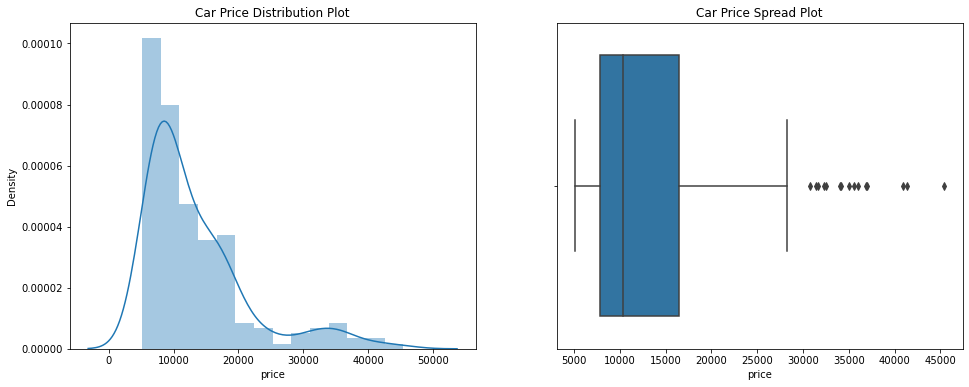

In [15]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_data.price)

plt.subplot(1, 2, 2)
plt.title('Car Price Spread Plot')
sns.boxplot(car_data.price)

plt.show()

In [16]:
# Getting Numeric Analysis
car_data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

### Visualising Categorical Data

In [17]:
car_data.select_dtypes('object').columns

Index(['fueltype', 'CarBrandName', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

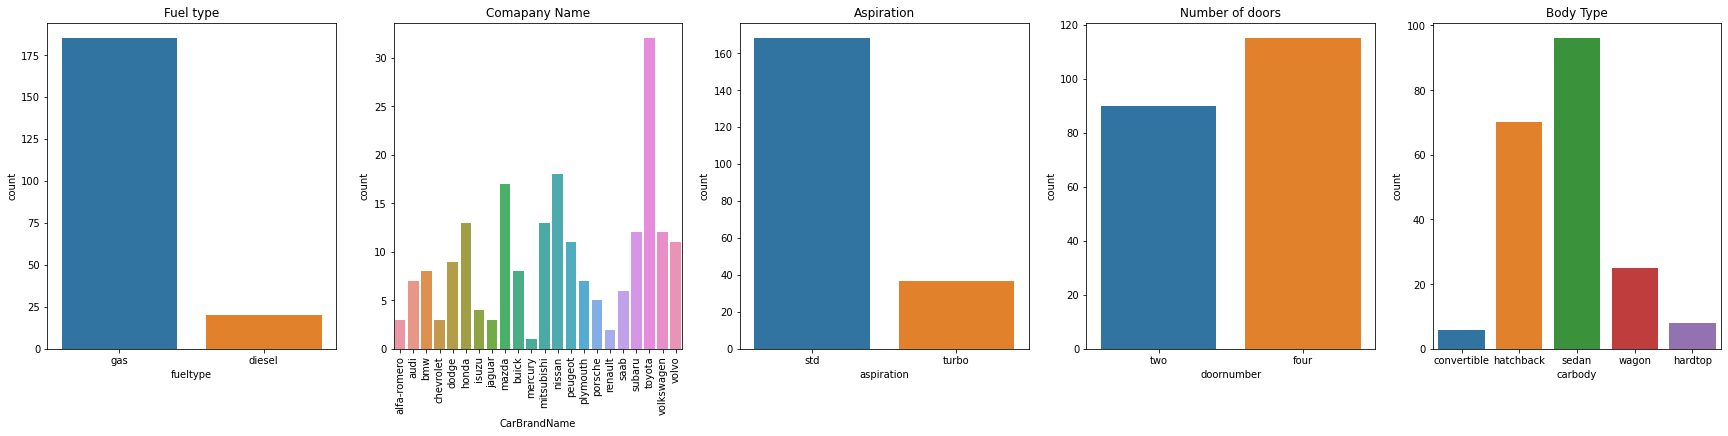

In [18]:
plt.figure(figsize=(30, 6))

plt.subplot(1,5,1)
plt.title('Fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
sns.countplot(car_data.fueltype)

plt.subplot(1,5,2)
plt.title('Comapany Name')
plt.xlabel('Car Brand')
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
sns.countplot(car_data.CarBrandName)

plt.subplot(1,5,3)
plt.title('Aspiration')
plt.xlabel('Aspiration')
plt.ylabel('Frequency')
sns.countplot(car_data.aspiration)

plt.subplot(1,5,4)
plt.title('Number of doors')
plt.xlabel('Door numbers')
plt.ylabel('Frequency')
sns.countplot(car_data.doornumber)

plt.subplot(1,5,5)
plt.title('Body Type')
plt.xlabel('car body')
plt.ylabel('Frequency')
sns.countplot(car_data.carbody)

plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

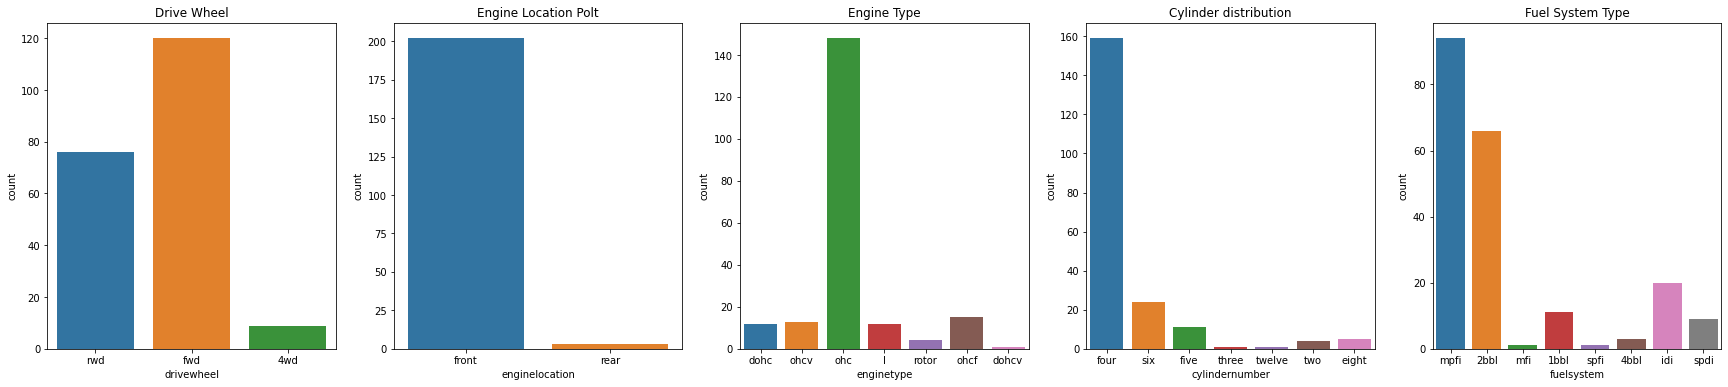

In [19]:
plt.figure(figsize=(30, 6))


plt.subplot(1,5,1)
plt.title('Drive Wheel')
plt.xlabel('Drive Wheel')
plt.ylabel('Frequency')
sns.countplot(car_data.drivewheel)

plt.subplot(1,5,2)
plt.title('Engine Location Polt')
plt.xlabel('Location')
plt.ylabel('Frequency')
sns.countplot(car_data.enginelocation)

plt.subplot(1,5,3)
plt.title('Engine Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
sns.countplot(car_data.enginetype)

plt.subplot(1,5,4)
plt.title('Cylinder distribution')
plt.xlabel('Number of cylinders')
plt.ylabel('Frequency')
sns.countplot(car_data.cylindernumber)

plt.subplot(1,5,5)
plt.title('Fuel System Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
sns.countplot(car_data.fuelsystem)

plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


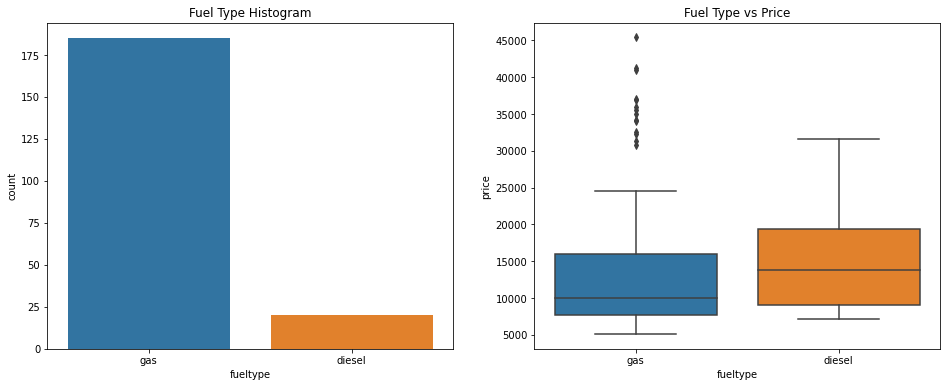

In [20]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(car_data.fueltype)

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=car_data.fueltype, y=car_data.price)

plt.show()



C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


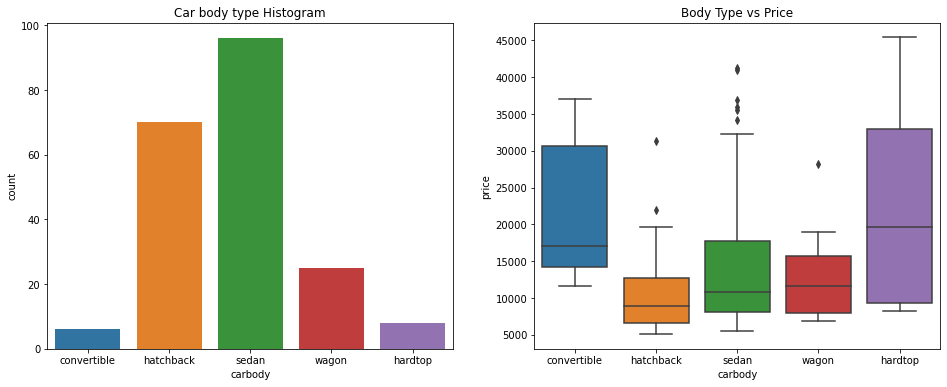

In [21]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Car body type Histogram')
sns.countplot(car_data.carbody)

plt.subplot(1,2,2)
plt.title('Body Type vs Price')
sns.boxplot(x=car_data.carbody, y=car_data.price)

plt.show()

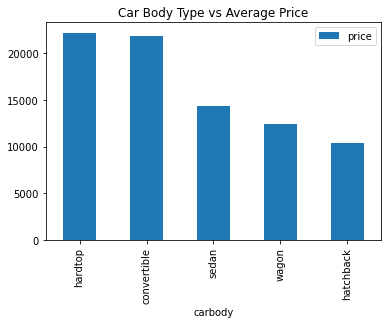

In [22]:
df = pd.DataFrame(car_data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Body Type vs Average Price')
plt.show()

####  Diesel has higher average price than gas.
#### Hardtop and convertible have higher average price.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


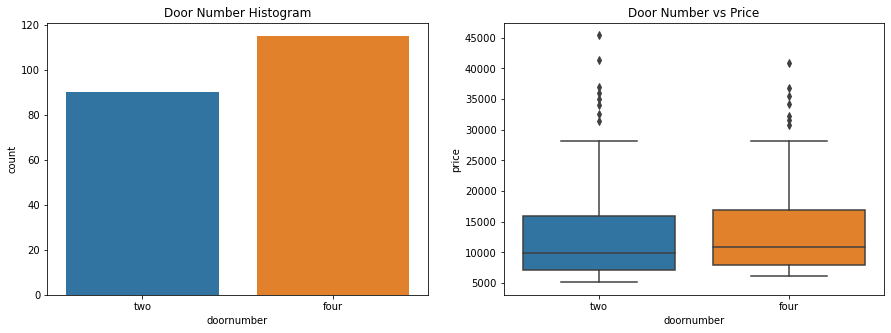

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


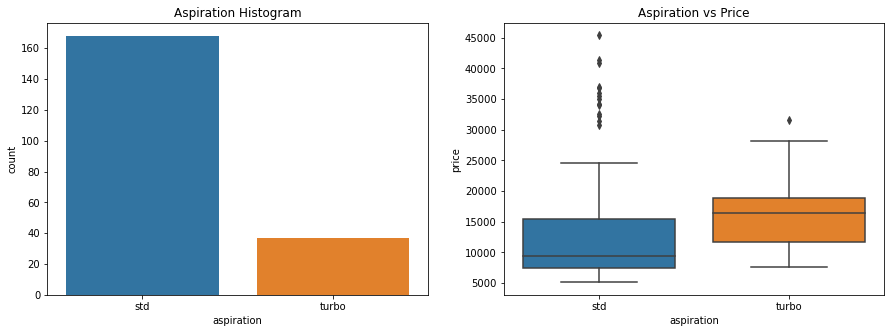

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car_data.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_data.doornumber, y=car_data.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car_data.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car_data.aspiration, y=car_data.price)

plt.show()

### Visualising Numberical Data

In [24]:
car_data.select_dtypes(include = ['int64','float64']).columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

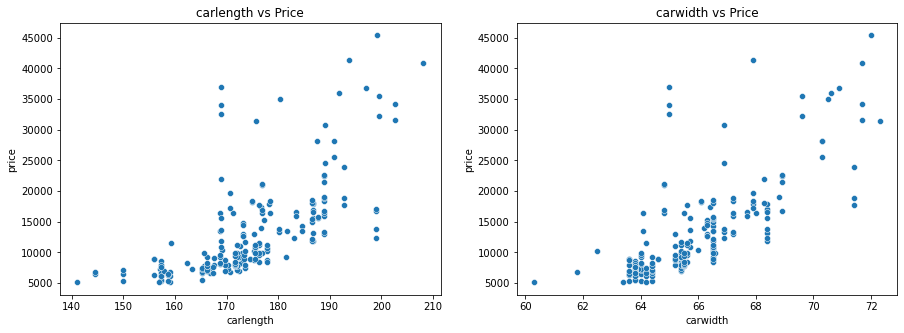

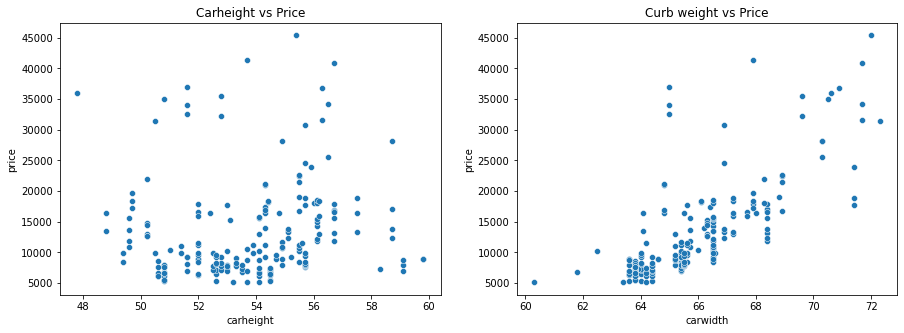

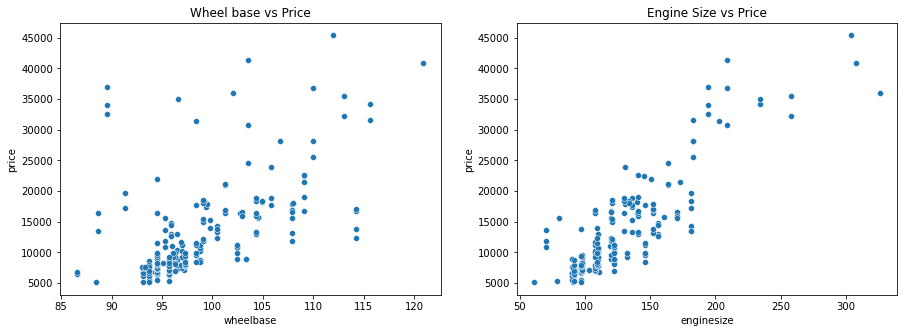

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('carlength vs Price')
sns.scatterplot(x=car_data.carlength, y=car_data.price)

plt.subplot(1,2,2)
plt.title('carwidth vs Price')
sns.scatterplot(x=car_data.carwidth, y=car_data.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Carheight vs Price')
sns.scatterplot(x=car_data.carheight, y=car_data.price)

plt.subplot(1,2,2)
plt.title('Curb weight vs Price')
sns.scatterplot(x=car_data.carwidth, y=car_data.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Wheel base vs Price')
sns.scatterplot(x=car_data.wheelbase, y=car_data.price)

plt.subplot(1,2,2)
plt.title('Engine Size vs Price')
sns.scatterplot(x=car_data.enginesize, y=car_data.price)

plt.show()

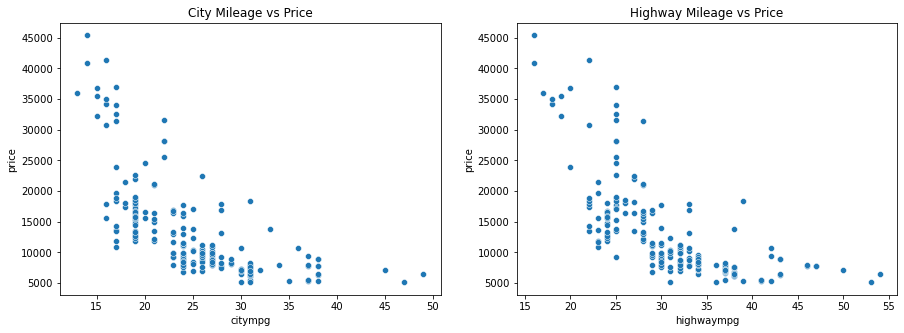

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('City Mileage vs Price')
sns.scatterplot(x=car_data.citympg, y=car_data.price)

plt.subplot(1,2,2)
plt.title('Highway Mileage vs Price')
sns.scatterplot(x=car_data.highwaympg, y=car_data.price)

plt.show()

### Feature Engineering

In [27]:
# creating a new feature using citympg and highwaympg
car_data['mpg'] = (0.60 * car_data.citympg) + (0.40 * car_data.highwaympg)
# drop the original variables
car_data.drop(['citympg', 'highwaympg'], axis = 1, inplace = True)
car_data.head()

,symboling,fueltype,CarBrandName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.4
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.4
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.8
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.4
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.6


### Feature Selection

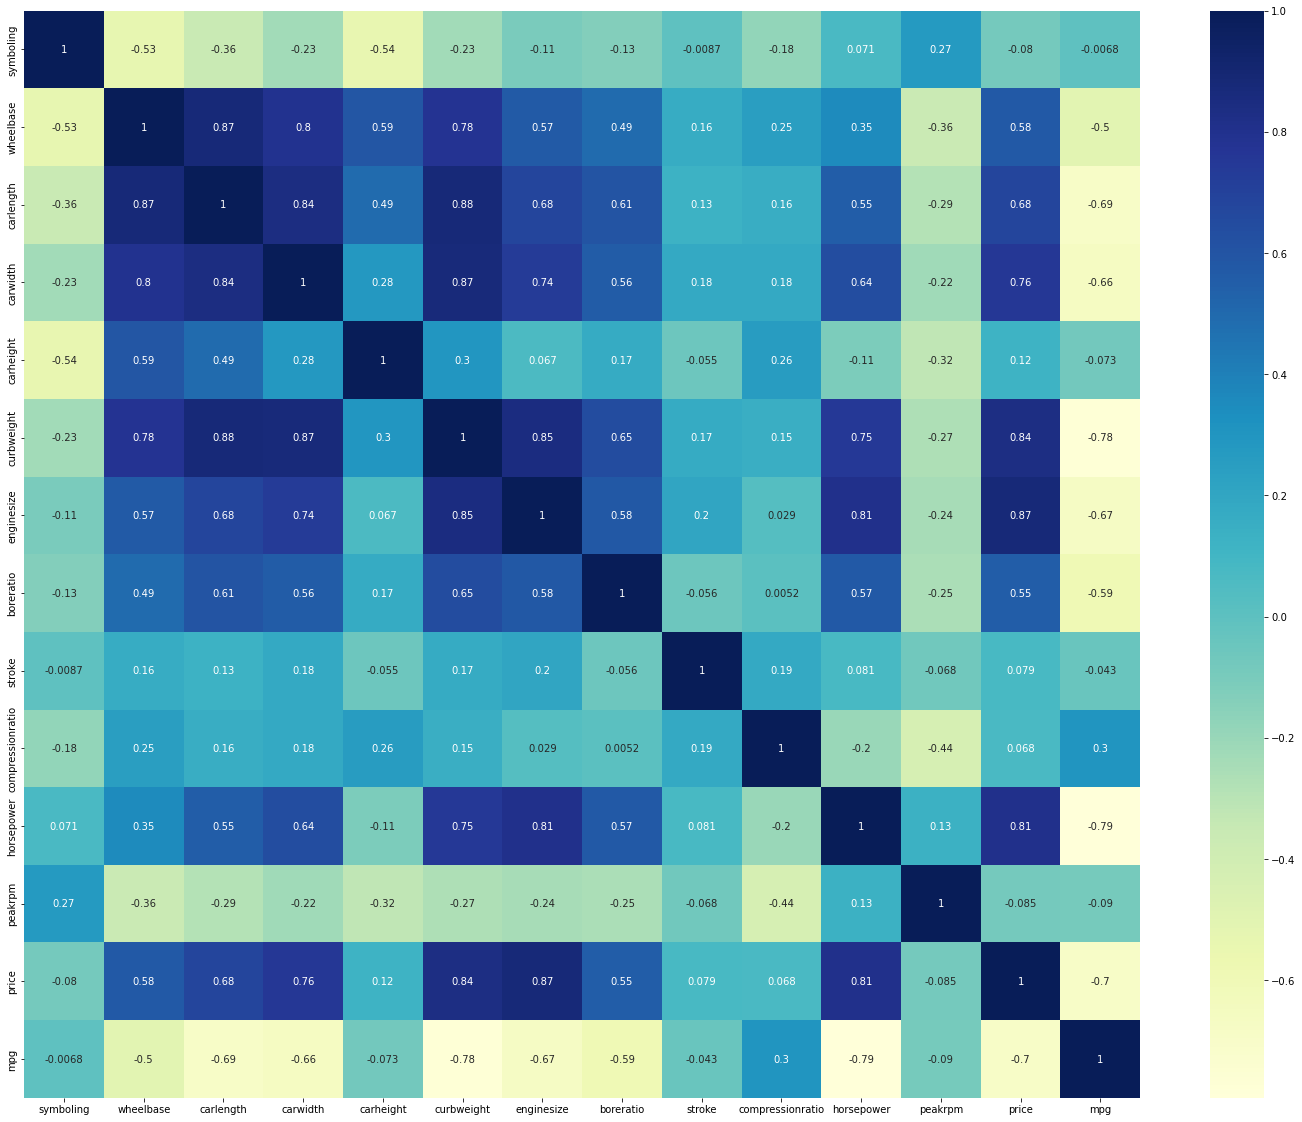

In [28]:
#Correlation using heatmap
plt.figure(figsize = (25, 20))
sns.heatmap(car_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Based on correlation analysis the important variables are:
- wheelbase
- carlength
- carwidth
- curbwieght
- enginesize
- boreratio
- horsepower 
- mpg
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 

In [29]:
car_data_new = car_data[[ 'wheelbase','carlength','carwidth','curbweight','fueltype','enginesize',
                         'boreratio','horsepower','mpg','enginetype','fueltype','carbody', 
                         'aspiration','cylindernumber','drivewheel','price']]
car_data_new.head()

,wheelbase,carlength,carwidth,curbweight,fueltype,enginesize,boreratio,horsepower,mpg,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,price
0,88.6,168.8,64.1,2548,gas,130,3.47,111,23.4,dohc,gas,convertible,std,four,rwd,13495.0
1,88.6,168.8,64.1,2548,gas,130,3.47,111,23.4,dohc,gas,convertible,std,four,rwd,16500.0
2,94.5,171.2,65.5,2823,gas,152,2.68,154,21.8,ohcv,gas,hatchback,std,six,rwd,16500.0
3,99.8,176.6,66.2,2337,gas,109,3.19,102,26.4,ohc,gas,sedan,std,four,fwd,13950.0
4,99.4,176.6,66.4,2824,gas,136,3.19,115,19.6,ohc,gas,sedan,std,five,4wd,17450.0


### Let's put Alltogether

In [30]:
#(sns.pairplot(car_data_new)).empty()
#plt.show()

### Getting input and Outputs for problem 

In [31]:
X = car_data_new.drop('price', axis =1)
y = car_data_new['price']
X.head()

,wheelbase,carlength,carwidth,curbweight,fueltype,enginesize,boreratio,horsepower,mpg,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel
0,88.6,168.8,64.1,2548,gas,130,3.47,111,23.4,dohc,gas,convertible,std,four,rwd
1,88.6,168.8,64.1,2548,gas,130,3.47,111,23.4,dohc,gas,convertible,std,four,rwd
2,94.5,171.2,65.5,2823,gas,152,2.68,154,21.8,ohcv,gas,hatchback,std,six,rwd
3,99.8,176.6,66.2,2337,gas,109,3.19,102,26.4,ohc,gas,sedan,std,four,fwd
4,99.4,176.6,66.4,2824,gas,136,3.19,115,19.6,ohc,gas,sedan,std,five,4wd


#### Encode categorical columns

In [32]:
X = pd.get_dummies(X, columns= ['enginetype','fueltype','carbody','aspiration','cylindernumber','drivewheel'], drop_first= True)
X.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mpg,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,2548,130,3.47,111,23.4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,23.4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,21.8,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,26.4,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,19.6,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0


In [33]:
X.shape

(205, 29)

#### Splitting data into train and test

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
print(X_train.shape, X_test.shape)

(153, 29) (52, 29)


### Model Building

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Getting Accuarcies

In [36]:
from sklearn.metrics import r2_score
print("Train Accuracy:",r2_score(lr.predict(X_train), y_train))
print("Test Accuracy:", r2_score(lr.predict(X_test), y_test))

Train Accuracy: 0.9137404732861956
Test Accuracy: 0.8501831304434632


### Interpretation of model

In [37]:
variable = X.columns
coeff = lr.coef_.round(2)
var_coeff = pd.DataFrame(list(zip(variable, coeff)),
               columns =['Variable', 'Coefficients'])

In [38]:
var_coeff

,Variable,Coefficients
0,wheelbase,73.12
1,carlength,-65.21
2,carwidth,654.38
3,curbweight,3.00
4,enginesize,57.76
5,boreratio,-4255.36
6,horsepower,96.07
7,mpg,62.65
8,enginetype_dohcv,-14806.02
9,enginetype_l,2875.89


In [39]:
import pickle
# using the dump() function to save the model using pickle
saved_model = pickle.dumps(lr)
# loading that saved model
lr_from_pickle = pickle.loads(saved_model)
# use this to make predictions
lr_from_pickle.predict(X_test)

array([ 6118.30500338,  5328.98896682,  4841.01884462,  7140.13156522,
        8308.31700803, 26607.15600147,  5948.91530688, 10021.15833535,
        4765.93579606, 10468.70414064, 17534.93239144, 21011.1116689 ,
       15742.48380779,  8764.7604727 , 14595.73149567, 15361.95866663,
        7689.69647743,  7026.39480408,  9292.48468452, 11614.62738563,
       11895.00545327,  6568.36509177, 11691.70571628,  7066.98551226,
       14129.98938174,  7074.44795516, 14983.66712397, 10239.54350243,
        5499.0295365 ,  8143.82110889,  8641.91978788,  9727.02011062,
       30346.14299556, 10372.70692579, 17021.18098213, 10230.53353661,
        8832.4165624 , 31423.84274701, 16306.84998599, 15960.89674373,
        5578.84382542, 18328.79571664,  9718.76443252, 10642.11889591,
        9791.68171156,  4908.90712078, 41626.43150245,  5200.75702664,
       17141.17751434, 15701.70998953, 25798.82026788, 14338.08286398])

In [43]:
lr.predict([[88.6,168.8,64.1,2548,130,3.47,111,23.4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1]])

array([13048.74317419])

In [42]:
#lr.predict((car_data.head()))